<a href="https://colab.research.google.com/github/Anushka118/MTech/blob/aci/Game_with_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

List all the team members BITS ID ,Name along with % of contribution in this assignment:
1. ANUSHKA SHARMA
   BITSID: 2024ab05067@wilp.bits-pilani.ac.in
   CONTRIBUTION %: 100

2. AYUSH KUMAR
   BITSID: 2024ab05069@wilp.bits-pilani.ac.in
   CONTRIBUTION %: 100

# **Problem 1**

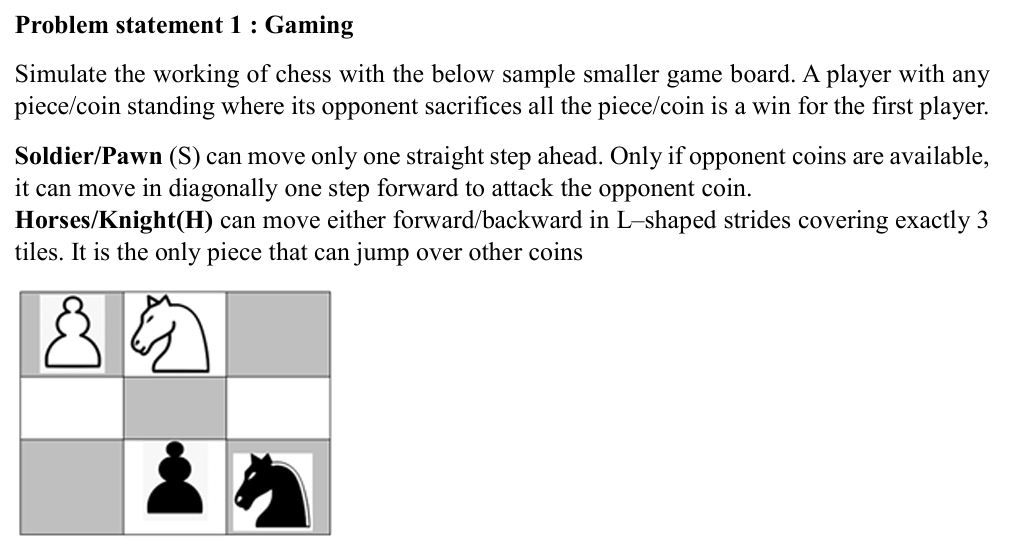

## Import Libraries

In [ ]:
import numpy as np
import random
from time import sleep
import copy

## Define Functions

### Create the board

In [ ]:
#Create thr initial board
def create_board():
  return [
      ['S1','H1','.'],
      ['.','.','.'],
      ['.','S2','H2']
    ]


### Check if a piece is white or black

In [ ]:
#Check if a piece is white
def is_white_piece(piece):
    return piece in ('S1', 'H1')

#Check if a piece is black
def is_black_piece(piece):
    return piece in ('S2', 'H2')

### Get the possible moves for Pawn
1. If the white pawn is moving, it will move from row 0 to row 2, i.e. direction is downwards, increase in rows.
2. If the black pawn is moving, it will move from row 2 to row 1, i.e. direction is upwards, decrease in rows
```
direction = 1 if is_white else -1
```





In [ ]:
#Get possible pawn moves
def get_pawn_moves(board, row, col, is_white):
  moves = []
  direction = 1 if is_white else -1
  next_row = row + direction

  # move 1 square forward
  if 0 <= next_row < 3 and board[next_row][col] == '.':
    moves.append((next_row, col))

  # Diagonal captures
  diagonal_cols = [col-1, col+1]
  for next_col in diagonal_cols:
    if 0 <= next_row <3 and 0<=next_col<3:
      target = board[next_row][next_col]
      if target != '.':
        if is_white and is_black_piece(target):
          moves.append((next_row, next_col))
        elif not is_white and is_white_piece(target):
          moves.append((next_row, next_col))
  return moves

### Get the possible moves for Knight

In [ ]:
#Return possible Knight moves
def get_knight_moves(board, row, col):
    """Returns a list of possible knight moves."""
    moves = []
    possible_moves = [
        (row - 2, col - 1),
        (row - 2, col + 1),
        (row - 1, col - 2),
        (row - 1, col + 2),
        (row + 1, col - 2),
        (row + 1, col + 2),
        (row + 2, col - 1),
        (row + 2, col + 1),
    ]

    for r, c in possible_moves:
        if 0 <= r < 3 and 0 <= c < 3:
            moves.append((r, c))
    return moves

### Get all possible moves for a player

In [ ]:
# Get all possible moves for a player
def get_all_possible_moves(board, is_white):
    moves = []
    for row in range(3):
        for col in range(3):
            piece = board[row][col]
            if piece != '.':
                if (is_white and is_white_piece(piece)) or (not is_white and is_black_piece(piece)):
                    if piece[0] == 'S':
                        piece_moves = get_pawn_moves(board, row, col, is_white)
                    elif piece[0] == 'H':
                        piece_moves = get_knight_moves(board, row, col)
                    else:
                        continue

                    for move_row, move_col in piece_moves:
                        moves.append(((row, col), (move_row, move_col)))
    # print(moves)
    return moves


### Move the piece on the board

In [ ]:
# Make a move on the board
def make_move(board, move):
    new_board = copy.deepcopy(board)
    start_row, start_col = move[0]
    end_row, end_col = move[1]
    new_board[end_row][end_col] = new_board[start_row][start_col]
    new_board[start_row][start_col] = '.'
    return new_board

### Applying MiniMax to get the best move for AI

In [ ]:
# Minimax algorithm
def minimax(board, depth, maximizing_player):
    if depth == 0 or game_over(board):
        return evaluate_board(board)

    if maximizing_player:
        max_eval = float('-inf')
        for move in get_all_possible_moves(board, True):
            new_board = make_move(board, move)
            eval = minimax(new_board, depth - 1, False)
            max_eval = max(max_eval, eval)
        return max_eval
    else:
        min_eval = float('inf')
        for move in get_all_possible_moves(board, False):
            new_board = make_move(board, move)
            eval = minimax(new_board, depth - 1, True)
            min_eval = min(min_eval, eval)
        return min_eval

### Find the best move

In [ ]:
#Find the best move using MiniMax
def find_best_move(board, maximizing_player, depth):
    best_move = None
    best_eval = float('-inf') if maximizing_player else float('inf')

    for move in get_all_possible_moves(board, maximizing_player):
        new_board = make_move(board, move)
        eval = minimax(new_board, depth, not maximizing_player)

        if maximizing_player:
            if eval > best_eval:
                best_eval = eval
                best_move = move
        else:
            if eval < best_eval:
                best_eval = eval
                best_move = move

    return best_move


### Check if the game has ended

In [ ]:
# Check if the game is over
def game_over(board):
    white_pieces = 0
    black_pieces = 0
    for row in board:
        for piece in row:
            if is_white_piece(piece):
                white_pieces += 1
            elif is_black_piece(piece):
                black_pieces += 1
    return white_pieces == 0 or black_pieces == 0


###**JUSTIFICATION FOR USING THE BELOW EVALUATION FUNCITON**
1. **Pawn advancement Bonus:**
  1. White pawn --> +0.2 if row > 0 (==> moving down)
  2. Black pawn --> +0.2 if row < 2 (==> moving up)
  
  In this 3X3 space, a pawn closer to the enemy is slightly more dangerous and restricts the opposnent more.

2. **Knight Moves Bonus:** The small board size (3X3), magnifies the knight's ability to jump. It can quickly move to any part of the board, making it very difficult to defend against. This is why it has been assigned a +0.5 value when moved. If it is at the centre of the board it is even more threatening as it can attack 4 squares at once. Therefore,
    1. Knight moves to centre --> +3
    2. Knight moves anywhere else --> +0.5

The knight is valued higher than pawn due to its superior mobility, tactical potential, control and relative value. These factors amplify in a 3X3 game.

In [ ]:
# Evaluation function
def evaluate_board(board):
  white_score = 0
  black_score = 0

  for row in range(3):
      for col in range(3):
          piece = board[row][col]
          if piece == 'S1':
              white_score += 1
              # Positional bonus for advanced pawn
              if row > 0:  # Pawn has moved forward
                  white_score += 0.2
          elif piece == 'S2':
              black_score += 1
              # Positional bonus for advanced pawn
              if row < 2:  # Pawn has moved forward
                  black_score += 0.2
          elif piece == 'H1':
              white_score += 3
              for move_row, move_col in get_knight_moves(board, row, col):
                  if 0 <= move_row < 3 and 0 <= move_col < 3 and is_black_piece(board[move_row][move_col]):
                      white_score += 0.5  # Add bonus for threatening black piece
                      break # Only add bonus once per threatened piece
          elif piece == 'H2':
              black_score += 3
              for move_row, move_col in get_knight_moves(board, row, col):
                  if 0 <= move_row < 3 and 0 <= move_col < 3 and is_white_piece(board[move_row][move_col]):
                      black_score += 0.5  # Add bonus for threatening white piece
                      break  # Only add bonus once per threatened piece


  if white_score == 0:
        return -1000  # Black wins
  elif black_score == 0:
      return 1000   # White wins
  else:
      return white_score - black_score

In [ ]:
def print_board(board):
    for row in board:
      print(row)

### Getting the move from user

In [ ]:
# Get move from human
def get_human_move(board, is_white):
    while True:
        try:
            input_str = input("Enter your move (start_row, start_col) (end_row, end_col): ")
            parts = input_str.split()

            if len(parts) != 2:
                print("Invalid input format. Use (start_row, start_col) (end_row, end_col)")
                continue

            start_part = parts[0].strip("()")
            end_part = parts[1].strip("()")

            start_row, start_col = map(int, start_part.split(','))
            end_row, end_col = map(int, end_part.split(','))

            if not (0 <= start_row < 3 and 0 <= start_col < 3 and 0 <= end_row < 3 and 0 <= end_col < 3):
                print("Invalid row or column. Try again.")
                continue

            piece = board[start_row][start_col]
            if piece == '.':
                print("No piece at the starting position. Try again.")
                continue

            if (is_white and not is_white_piece(piece)) or (not is_white and not is_black_piece(piece)):
                print("That's not your piece. Try again.")
                continue

            move = ((start_row, start_col), (end_row, end_col))
            possible_moves = get_all_possible_moves(board, is_white)
            if move not in possible_moves:
                print("Invalid move. Try again.")
                continue

            return move

        except ValueError:
            print("Invalid input. Please enter integers in the format (row, col).")
        except Exception as e:
            print(f"An error occurred: {e}. Please check your input format.")

### Main function to play the game

In [ ]:
def play_game():

    board = create_board()

    human_is_white = True
    game_depth = 3

    print("Initial Board:")
    print_board(board)

    is_white_turn = True
    h=input('Play as White/Black? (W/B)')
    human_is_white = True if h == 'W' else False
    while True:
        if (human_is_white and is_white_turn) or (not human_is_white and not is_white_turn):
            # Human's turn
            print("\nYour turn:")

            possible_moves = get_all_possible_moves(board, is_white_turn)
            if not possible_moves:
                print("No legal moves available.")
                break  # Break out of the loop
            move = get_human_move(board, is_white_turn)
            board = make_move(board, move)
        else:
            # AI's turn
            print("\nAI's turn:")
            possible_moves = get_all_possible_moves(board, is_white_turn)
            if not possible_moves:
                print("AI has no legal moves.")
                break  # Break out of the loop
            move = find_best_move(board, is_white_turn, game_depth)
            if move:
                board = make_move(board, move)
                print("AI made move:", move)
            else:
                print("AI cannot make a move.")
                break  # Break out of the loop

        print_board(board)

        if game_over(board):
            print("\nGame Over!")
            white_pieces = 0
            black_pieces = 0
            for row in board:
                for piece in row:
                    if is_white_piece(piece):
                        white_pieces += 1
                    elif is_black_piece(piece):
                        black_pieces += 1
            if white_pieces > black_pieces:
                print("White wins!")
            elif black_pieces > white_pieces:
                print("Black wins!")
            else:
                print("It's a draw!")
            break

        is_white_turn = not is_white_turn

    # Check for stalemate after the loop breaks
    if not game_over(board):
        print("\nStalemate!")

In [ ]:
#Played as Black
play_game()

Initial Board:
['S1', 'H1', '.']
['.', '.', '.']
['.', 'S2', 'H2']

Your turn:
Invalid input format. Use (start_row, start_col) (end_row, end_col)


In [ ]:
#Played as white
play_game()

Initial Board:
['S1', 'H1', '.']
['.', '.', '.']
['.', 'S2', 'H2']
Play as White/Black? (W/B)W

Your turn:
Enter your move (start_row, start_col) (end_row, end_col): (0,1) (2,2)
['S1', '.', '.']
['.', '.', '.']
['.', 'S2', 'H1']

AI's turn:
AI made move: ((2, 1), (1, 1))
['S1', '.', '.']
['.', 'S2', '.']
['.', '.', 'H1']

Your turn:
Enter your move (start_row, start_col) (end_row, end_col): (0,0) (1,1)
['.', '.', '.']
['.', 'S1', '.']
['.', '.', 'H1']

Game Over!
White wins!
